In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('object.png')
img = np.array(img)

img = np.add.reduce(img, axis=-1) / 3

rows, cols = img.shape
area = total_points = rows * cols

n_random_points = 10000
chosen_points = np.random.randint(0, total_points, n_random_points)
chosen_points_y = [int(i / cols) for i in chosen_points]
chosen_points_x = [i % cols for i in chosen_points]

correct_points = 0
for x,y in zip(chosen_points_y, chosen_points_x):
    if img[x,y] < 255:
        correct_points += 1

print(correct_points)
estimated_area = correct_points / n_random_points * area
print(estimated_area)


10000
623200.0


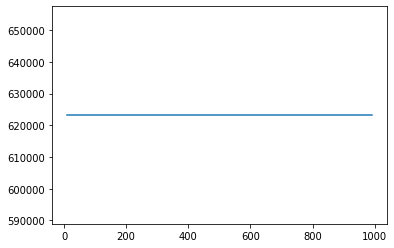

In [3]:
points = list(range(10,1000,10 ))
areas = []
for p in points:
    
    chosen_points = np.random.randint(0, total_points, p)
    chosen_points_y = [int(i / cols) for i in chosen_points]
    chosen_points_x = [i % cols for i in chosen_points]

    correct_points = 0
    for x,y in zip(chosen_points_y, chosen_points_x):
        if img[x,y] < 255:
            correct_points += 1

    estimated_area = correct_points / p * area
    areas.append(estimated_area)

plt.plot(points, areas)

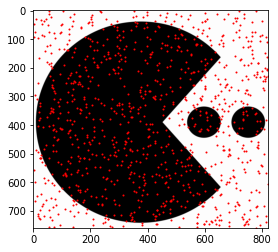

In [4]:
plt.imshow(img, cmap='gray')
plt.scatter(chosen_points_x, chosen_points_y, c='r', s=1)

In [42]:
def flatten(arr:np.array):
    return arr.reshape(-1)

a = np.array([[[1,2],[3,5]],[[4,5],[6,7]]])
flatten(a)

array([1, 2, 3, 5, 4, 5, 6, 7])

In [7]:
import numpy as np
def max_pool(arr:np.array, pool = (2,2), stride=2, padding = 'valid'):


    rows, cols = arr.shape
    pool_shape = pool[0]
    rows_new  = int((rows - pool_shape) / stride) + 1
    cols_new = int((cols - pool_shape) / stride) + 1
    result = np.zeros((rows_new,cols_new))
    for i in range(rows_new):
        for j in range(cols_new):
            result[i,j] = np.max(arr[i*stride:i*stride+pool_shape, j*stride:j*stride+pool_shape])
    return result




In [4]:
a = np.array([[1,2],[3,5]])
np.dot(a,a)

array([[ 7, 12],
       [18, 31]])

In [5]:
import numpy as np
def conv(arr:np.array,filter,  stride=2, padding = 'valid'):


    rows, cols = arr.shape
  
    rows_new  = int((rows - filter.shape[0]) / stride) + 1
    cols_new = int((cols - filter.shape[0]) / stride) + 1
    result = np.zeros((rows_new,cols_new))
    for i in range(rows_new):
        for j in range(cols_new):
            result[i,j] = np.sum(np.multiply(arr[i*stride:i*stride+filter.shape[0], j*stride:j*stride+filter.shape[0]], filter))
    return result

In [6]:
a = np.array([[1,2,3,4],
              [4,5,6,10], 
              [7,8,9, 10],
               [10,11,12, 13]])
kernel = np.array([[1,0, -1],[2,0, -2],[1,0, -1]])

In [7]:
conv(a, kernel, stride=2)

array([[-8.]])

60606.0


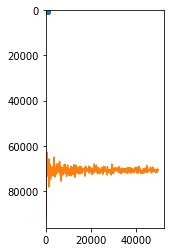

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 28 18:34:15 2021

@author: Izat
"""


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image





obj = np.array(Image.open(r"C:\\Users\\abdul\\Downloads\\img.jpg"))[:, :, 0]
plt.imshow(obj)
 
gen_num = 100
a = np.random.uniform(0, 740, gen_num)
b = np.random.uniform(0, 455, gen_num)
rand_map = np.vstack((a, b)).astype('int')
plt.plot(rand_map[0, :], rand_map[1, :], 'o')

#mapping
a = obj[rand_map[1, :], rand_map[0, :]] == 0
#find number of point in zone
number_of_p_in_zone = np.sum(a)


total_area = obj.shape[0]*obj.shape[1]
area = (number_of_p_in_zone/gen_num)*total_area
    

print(area)


def MCarea(total_area, gen_num):
    obj = np.array(Image.open(r"C:\\Users\\abdul\\Downloads\\img.jpg"))[:, :, 0]
    a = np.random.uniform(0, len(obj[0, :]), gen_num)
    b = np.random.uniform(0, len(obj[:, 0]), gen_num)
    rand_map = np.vstack((a, b)).astype('int')
    
    #mapping
    a = obj[rand_map[1, :], rand_map[0, :]] == 0
    #find number of point in zone
    number_of_p_in_zone = np.sum(a)
    
    #area
    area = (number_of_p_in_zone/gen_num)*total_area
    
    return(area)


#test on stability
gen_test = np.arange(10, 50000, 100)
data = []
for i in range(len(gen_test)):
    data.append(MCarea(total_area, gen_test[i]))
    
    

plt.figure(figsize=(10,8)) 
plt.plot(gen_test, data)







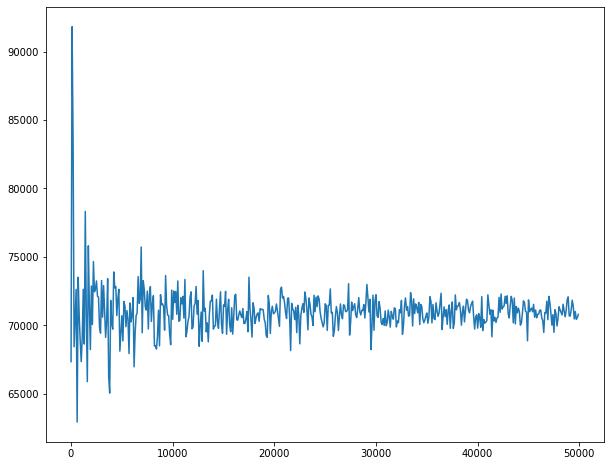

In [8]:
plt.figure(figsize=(10,8)) 
plt.plot(gen_test, data)


In [9]:
import numpy as np
from numpy.linalg import matrix_power

events = ['rainy', 'sunny', 'cloudy']

transition = np.array([[0.5, 0.25, 0.25],
                       [0.5, 0, 0.5],
                       [0.25, 0.25, 0.5]])

rain_ = np.array([1, 0, 0])
sun_ = np.array([0, 1, 0])
cloud_ = np.array([0, 0, 1])


In [18]:
sun_pred = sun_.dot(matrix_power(transition, 5))


In [19]:
sun_pred

array([0.40039062, 0.19921875, 0.40039062])

In [29]:
obj = np.array(Image.open(r"image.png"))[:, :, 0]

a = np.random.randint(0, len(obj[0, :]), gen_num)
b = np.random.randint(0, len(obj[:, 0]), gen_num)

In [32]:
rand_map = np.vstack((a, b)).astype('int')
rand_map

array([[1468,  935, 1335,  716,  715,  822,  527,  331,    0,  125,  464,
          86, 1130, 1524, 1022,  894,  907, 1019,  777,  863,  429,  277,
         805,  581,  722, 1443,  700, 1325,  113,  143,  217,  263,  848,
         516, 1016,  493, 1140, 1303,  669, 1377,  284, 1043, 1376,  773,
        1583,  472,  239,  623, 1487,  109, 1071,  930,  762,  961, 1414,
         574,  496, 1007,  256, 1536,  703, 1437, 1538,  805,  268,  645,
         844,  759,  647, 1553, 1118, 1433,  904,  879,  782,    5,  430,
        1218,  616,  344,  338,  118,  606, 1324, 1101, 1532, 1175,  356,
        1530,  816,  544,  654, 1007,  294,   76,  172,  874,   21,  535,
         450],
       [ 617,  110,  366,  556,  342,  367,  683,  682,  390,  146,  851,
         542,  941,  104,  542,  517,  848,  413,  869,  126,  798,  584,
         875,  984,   71,  627,  125,  674,  207,  392,  418,  460,  673,
         436,  162,  862,  900,  977,  122,  424,  277,  528,  667,  456,
         556,  113,  54

In [13]:
obj = np.array(Image.open(r"img.png"))[:, :, 0]

a = np.random.uniform(0, len(obj[0, :]), gen_num)
b = np.random.uniform(0, len(obj[:, 0]), gen_num)

rand_map = np.vstack((a, b)).astype('int')
plt.plot(rand_map[0, :], rand_map[1, :], 'o')

array([0.4, 0.2, 0.4])

In [50]:
gen_test = np.arange(10, 500000, 1000)
data = []

obj = np.array(Image.open(r"image.png"))[:, :, 0]

total_area = obj.shape[0]*obj.shape[1]

for i in range(len(gen_test)):
    data.append(MCarea(total_area, gen_test[i]))
    
    

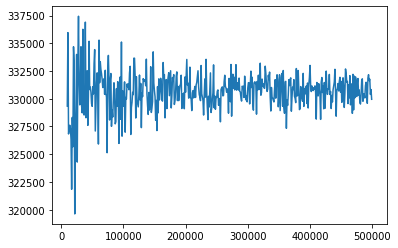

In [54]:
plt.plot(gen_test[10:], data[10:])    